In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train , y_train),(x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train.dtype , y_train.dtype , x_test.dtype , y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
### changing the data type to float

In [6]:
x_train = x_train.astype("float")/255
x_test = x_test.astype("float")/255

In [7]:
x_train.dtype , y_train.dtype , x_test.dtype , y_test.dtype

(dtype('float64'), dtype('uint8'), dtype('float64'), dtype('uint8'))

Data prepration

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
y_train_ohe.dtype

dtype('float32')

# data contains 10 classes(10 possible result) these are

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

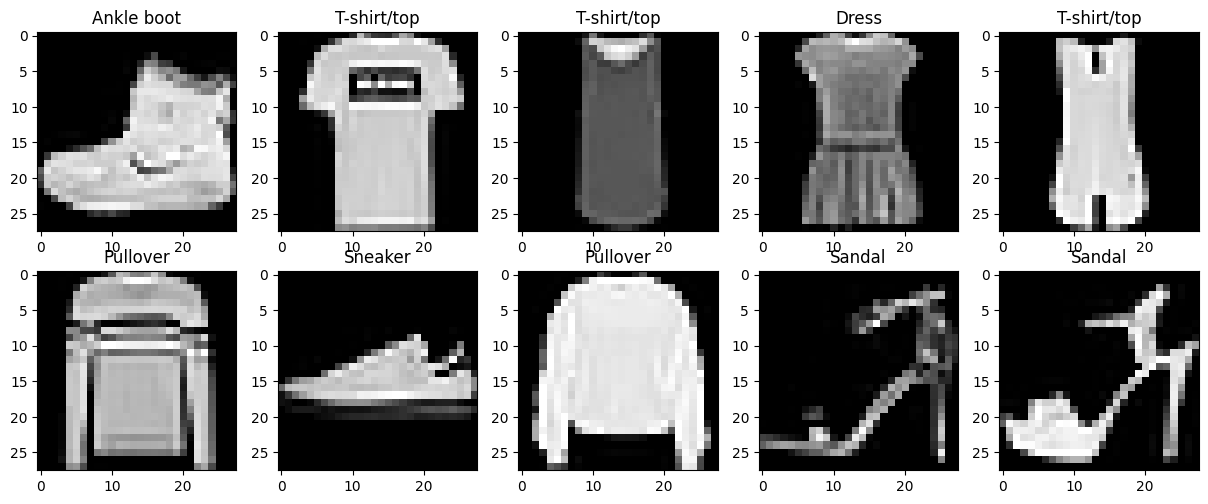

In [11]:
plt.figure(figsize = (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i],cmap = 'gray')
  plt.title(class_names[y_train[i]])
plt.show()

# Model building

In [12]:
'''
Input Dataset for ConvNets needs to be a 4D array
(1000, 28, 28, 3)

1000 - #Images
28, 28 - Size of the image (Height and width)
3 - #Channels (RGB = 3, Grayscale = 1)
'''

'\nInput Dataset for ConvNets needs to be a 4D array\n(1000, 28, 28, 3)\n\n1000 - #Images\n28, 28 - Size of the image (Height and width)\n3 - #Channels (RGB = 3, Grayscale = 1)\n'

In [13]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPool2D , Activation , Flatten
from tensorflow.keras.optimizers import Adam,Adadelta

#Increase the LR or Train for Longer increase epochs
 -Add more conv layers
 -Kernels
 -Size of the Kernel
 -If Overfitting
 -Dropout
 -Regularizers
 -Normalize / Min Max scaling data

In [15]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3) , strides=(1,1) , padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10, activation = 'Softmax'))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])

In [17]:
model.fit(x = x_train , y = y_train_ohe , batch_size = 2000 , epochs = 40 , validation_data = (x_test , y_test_ohe))

Epoch 1/40
30/30 [==============================] - 21s 646ms/step - loss: 1.7810 - accuracy: 0.4677 - val_loss: 1.3267 - val_accuracy: 0.6154
Epoch 2/40
30/30 [==============================] - 9s 308ms/step - loss: 1.0823 - accuracy: 0.6599 - val_loss: 0.9212 - val_accuracy: 0.6872
Epoch 3/40
30/30 [==============================] - 11s 377ms/step - loss: 0.8300 - accuracy: 0.7148 - val_loss: 0.7794 - val_accuracy: 0.7228
Epoch 4/40
30/30 [==============================] - 11s 357ms/step - loss: 0.7254 - accuracy: 0.7531 - val_loss: 0.7075 - val_accuracy: 0.7561
Epoch 5/40
30/30 [==============================] - 11s 357ms/step - loss: 0.6645 - accuracy: 0.7767 - val_loss: 0.6618 - val_accuracy: 0.7713
Epoch 6/40
30/30 [==============================] - 11s 358ms/step - loss: 0.6229 - accuracy: 0.7924 - val_loss: 0.6264 - val_accuracy: 0.7861
Epoch 7/40
30/30 [==============================] - 13s 426ms/step - loss: 0.5913 - accuracy: 0.8018 - val_loss: 0.5982 - val_accuracy: 0.7956


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (2000, 26, 26, 3)         30        
                                                                 
 activation (Activation)     (2000, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (2000, 13, 13, 3)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (2000, 507)               0         
                                                                 
 dense (Dense)               (2000, 10)                5080      
                                                                 
Total params: 5110 (19.96 KB)
Trainable params: 5110 (19.96 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [19]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

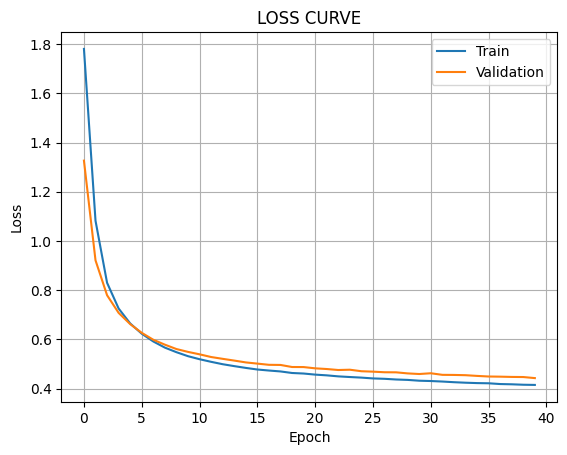

In [20]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

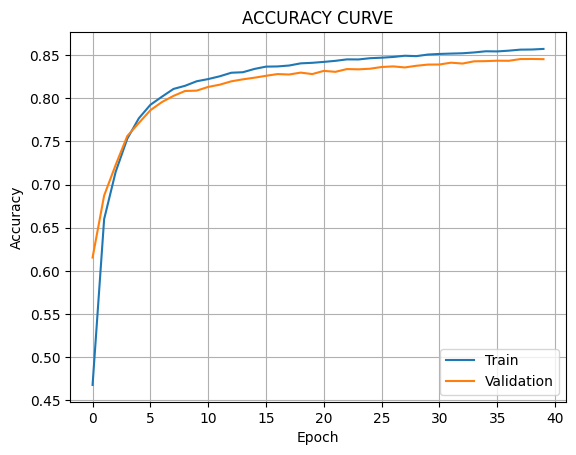

In [21]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [22]:
import numpy as np

In [23]:
preds = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


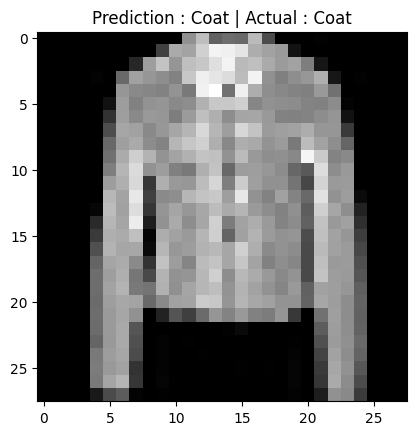

In [24]:
n = 10
plt.imshow(x_test[n].reshape(28,28), cmap="gray")
plt.title(f"Prediction : {class_names[np.argmax(preds[n])]} | Actual : {class_names[y_test[n]]}")
plt.show()